### ----------------------------------------------------------------------------------------------------------------------
### Darie-Dragos Mitoiu - 1905367
### CM4107 Advanced Artificial Intelligence
### MNIST New Training Data v1.0.0 26/10/2020
### A jupyter notebook for the creation of new mnist new training data
### ----------------------------------------------------------------------------------------------------------------------

In [111]:
import pandas as pd
import numpy as np
import scipy.special
import os 
import imageio
import glob
import operator
from scipy import ndimage
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
def rotate_image(inputs, degree):
  
    ## create rotated variations
    # rotated anticlockwise by x degrees
    inputs_plusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), degree, cval=0.01, order=1, reshape=False)
    new_inputs1 = inputs_plusx_img.reshape(784)
    # rotated clockwise by x degrees
    inputs_minusx_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -degree, cval=0.01, order=1, reshape=False)
    new_inputs2 = inputs_minusx_img.reshape(784)
    
    return (new_inputs1, new_inputs2)

### Setting Preferences

In [113]:
# Setting matplotlib inline
%matplotlib inline

In [114]:
# Setting seaborn style
sns.set_style("darkgrid")

In [115]:
# Setting numpy seed
np.random.seed(42)

### Set Global Variables

In [116]:
# Set the training file name
train_file = "data/mnist_train.csv"
# The testing file name
test_file = "data/mnist_test.csv"

# Set the number of input nodes
input_nodes = 784
# Set the number of hidden nodes
hidden_nodes = 200
# Set the number of output nodes
output_nodes = 10

# Set the epochs number
epochs = 10
# Set the batch size number
batch_size = 1
# Set the learning rate number
learning_rate = 0.3

### Load MNIST Training and Testing Datasets

In [117]:
# Read the training dataset
df_orig_train = pd.read_csv(train_file, nrows=3500, header=None)
# Read the testing dataset
df_orig_test = pd.read_csv(test_file, nrows=100, header=None)

In [118]:
# Read the training dataset
df_orig_train_knn = pd.read_csv(train_file, nrows=500, header=None)
# Read the testing dataset
df_orig_test_knn = pd.read_csv(test_file, nrows=100, header=None)

### MNIST Training Data Insight

In [119]:
print("The number of records in the mnist training dataset is: ",df_orig_train.shape[0])
print("The number of columns in the mnist training dataset is: ", df_orig_train.shape[1])

The number of records in the mnist training dataset is:  3500
The number of columns in the mnist training dataset is:  785


In [120]:
# Show training dataset relevant information
df_orig_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 21.0 MB


In [121]:
# Show the head of the training dataset
df_orig_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MNIST Testing Data Insight 

In [122]:
print("The number of records in the mnist testing dataset is: ",df_orig_test.shape[0])
print("The number of columns in the mnist testing dataset is: ", df_orig_test.shape[1])

The number of records in the mnist testing dataset is:  100
The number of columns in the mnist testing dataset is:  785


In [123]:
# Show testing dataset relevant information
df_orig_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 613.4 KB


In [124]:
# Show testing dataset relevant information
df_orig_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 613.4 KB


In [125]:
# Show the head of the testing dataset
df_orig_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rotate ANN Training Data

In [126]:
degree = 35
rotated_train = []

for i in range(len(df_orig_train)):
    label = df_orig_train.iloc[i, 0]
    instance_plus, instance_minus = rotate_image(np.array(df_orig_train.iloc[i, 1:]), degree)
    instance_plus = np.insert(instance_plus, 0, label)
    instance_minus = np.insert(instance_minus, 0, label)
    rotated_train.append(instance_plus)
    rotated_train.append(instance_minus)
    
#image_array = np.asfarray(rotated_train[5]).flatten().reshape((28,28))
# print the grid in grey scale
#plt.imshow(image_array, cmap='Greys', interpolation='None') 

### Rotate kNN Training Data

In [127]:
degree = 35
rotated_train_knn = []

for i in range(len(df_orig_train_knn)):
    label = df_orig_train.iloc[i, 0]
    instance_plus, instance_minus = rotate_image(np.array(df_orig_train_knn.iloc[i, 1:]), degree)
    instance_plus = np.insert(instance_plus, 0, label)
    instance_minus = np.insert(instance_minus, 0, label)
    rotated_train_knn.append(instance_plus)
    rotated_train_knn.append(instance_minus)

### MNIST Training Data Frame Dimensionality

In [128]:
df_rotated_train = pd.DataFrame(data=rotated_train)

y_train_all =  pd.get_dummies(df_rotated_train[0]).values
X_train_all = df_rotated_train.drop(0, axis = 1).values
print(y_train_all.shape)
print(X_train_all.shape)

(7000, 10)
(7000, 784)


### MNIST Testing Data Frame Dimensionality

In [129]:
y_test_all =  pd.get_dummies(df_orig_test[0]).values
X_test_all = df_orig_test.drop(0, axis = 1).values
print(y_test_all.shape)
print(X_test_all.shape)

(100, 10)
(100, 784)


### Data Pre-Processing

In [130]:
# Select smaller samples of the train and test datasets
train_sample_size = 3500  # choosing a smaller sample instead of the entire dataset
random_indices = np.random.choice(range(len(y_train_all)), train_sample_size, replace = False)

X_train = X_train_all[random_indices]
y_train = y_train_all[random_indices]
print(y_train.shape)
print(X_train.shape)

#preprocessing steps
X_train = (X_train / 255.0 * 0.99) + 0.01
y_train = y_train + 0.01
y_train = np.where(y_train != 1.01, y_train, 0.99)
print(y_train.shape)

test_sample_size = 100 
random_test_indices = np.random.choice(range(len(y_test_all)), test_sample_size, replace = False)
X_test = X_test_all[random_test_indices]
y_test = y_test_all[random_test_indices]
print(y_test.shape)
print(X_test.shape)

X_test = (X_test / 255.0 * 0.99) + 0.01
y_test = y_test + 0.01
y_test = np.where(y_test != 1.01, y_test, 0.99)

(3500, 10)
(3500, 784)
(3500, 10)
(100, 10)
(100, 784)


In [131]:
train_instances_knn = np.array(rotated_train_knn)
test_instances_knn = df_orig_test_knn.values

X_train_knn = train_instances_knn[:, 1:]
Y_train_knn = train_instances_knn[:, 0]
X_test_knn = test_instances_knn[:, 1:]
Y_test_knn = test_instances_knn[:, 0]

### Utility Functions

In [132]:
def mean_squared_error(predictions, targets):
    """
    Calculates mean squared error of a model's predictions.
    """
    N=targets.size
    mse = ((targets - predictions) **2).sum() / (2*N)
    return mse


def accuracy(predictions, targets):
    """
    Calculates the accuracy of a model's predictions.
    """
    prediction_labels = np.argmax(predictions, axis=1)
    target_labels = np.argmax(targets, axis=1)
    predictions_correct = (prediction_labels == target_labels.round())
    accuracy = predictions_correct.mean()
    return accuracy

### Activation Classes

In [133]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
    def backward(self, inputs):
        self.output = np.greater(inputs, 0).astype(int) # inputs > 0 then convert bools to int
        
class Activation_Sigmoid:
    def forward(self, x):
        return(1 / (1 + np.exp(-x)))
    def backward(self, x):
        return(x * ( 1 - x))

### Layer Class

In [134]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons, learningrate=0.01, activation='sigmoid'):
        
        self.weights = np.random.normal(0.0, pow(n_inputs, -0.5), (n_inputs, n_neurons))
        print(self.weights.shape)
        self.biases = np.zeros((1, n_neurons))
       
        self.lr = learningrate
        self.activate=activation  
        
    def forward(self, inputs):
        self.in_values = inputs
        self.layer_input = np.dot(inputs , self.weights) + self.biases
        self.activation()
    
    def activation(self):
        if self.activate == 'sigmoid':
            a = Activation_Sigmoid()
            self.layer_output = a.forward(self.layer_input)
            
           
    def del_activation(self):
        if self.activate == 'sigmoid':
            del_a = Activation_Sigmoid()
            self.del_layer_output =  del_a.backward(del_a.forward(self.layer_input))
      
    def backward(self, delta_in, weights_in, targets=None, output_layer=False):
        self.del_activation()
        if output_layer:
            self.layer_error = self.layer_output - targets
            self.layer_delta = self.layer_error * self.del_layer_output
        else:          
            self.layer_error = np.dot(delta_in, weights_in.T)
            self.layer_delta = self.layer_error * self.del_layer_output
        
    def weight_update(self, prev_layer_output):
        # print("prev_layer_output.T.shape: "+str(prev_layer_output.T.shape))
        # print("self.layer_delta.shape: "+str(self.layer_delta.shape))
        N = self.layer_delta.shape[0]
        weights_update = np.dot(prev_layer_output.T, self.layer_delta) / N
        # print(weights_update.shape)
        self.weights -= self.lr * weights_update
        biases_update = np.mean(self.layer_delta, axis=0, keepdims=True)
        # print("biases_update.shape: "+ str(biases_update.shape))
        # print("self.biases.shape: "+ str(self.biases.shape))
        self.biases -= self.lr * biases_update

### Creating Layers

In [135]:
layer1 = Layer_Dense(784, 200) # set the weight matrix dimensions (input nodes x hidden nodes)
output = Layer_Dense(200, 10) # set the weight matrix dimensions (hidden nodes x output nodes)

# maintain a dataframe to keep track of the network error
monitoring = {}
monitoring['mean_squared_error'] = []
monitoring['accuracy'] = []

# iterate and update weights at each epoch
for epoch in range(100):
    layer1.forward(X_train)
    # print('layer1 output \n' ,layer1.layer_output.shape)
    output.forward(layer1.layer_output)
    # print('layer output  \n', output.layer_output.shape)

    # train metrics
    pred = output.layer_output
    mse = mean_squared_error(pred, y_train)
    acc = accuracy(output.layer_output, y_train)
    monitoring['mean_squared_error'].append(mse)
    monitoring['accuracy'].append(acc)

    # backprop through the layers 
    output.backward(None, None, y_train, True)
    # print('layer out delta  \n', output.layer_delta.shape)
    layer1.backward(output.layer_delta, output.weights)
    # print('layer1 delta  \n', layer1.layer_delta.shape)

    # update all the layer weights
    output.weight_update(layer1.layer_output)
    # print('layer weights  \n', output.weights.shape)
    layer1.weight_update(X_train)
    # print('layer weights  \n', layer1.weights.shape)

monitoring_df = pd.DataFrame(monitoring)   
monitoring_df

(784, 200)
(200, 10)


,mean_squared_error,accuracy
0,0.122175,0.093429
1,0.117328,0.093429
2,0.112744,0.093429
3,0.108423,0.093429
4,0.104359,0.093429
...,...,...
95,0.045061,0.161714
96,0.045017,0.162000
97,0.044974,0.162000
98,0.044933,0.162286


### Creating Artificial Neural Network

In [136]:
class ANN():
    def __init__(self, ouput_layer, hidden_layer, batch_size = 10):
        self.output = ouput_layer
        self.layer1 = hidden_layer
        self.batch_size = batch_size

    def batch_input(self, x, y):
        for i in range(0, len(x), self.batch_size):
            yield (x[i:i + self.batch_size], y[i:i + self.batch_size])

    def train(self, x, y, epochs, lr):
        self.layer1.lr = lr
        self.output.lr = lr

        monitoring = {}
        monitoring['mean_squared_error'] = []
        monitoring['accuracy'] = []

        for epoch in range(epochs):

            for (batch_x, batch_y) in self.batch_input(x, y):
                self.layer1.forward(batch_x)
                # print('layer1 output \n' ,layer1.layer_output.shape)
                self.output.forward(self.layer1.layer_output)
                # print('layer output  \n', output.layer_output.shape)

                # backprop through the layers 
                self.output.backward(None, None, batch_y, True)
                # print('layer out delta  \n', output.layer_delta.shape)
                self.layer1.backward(self.output.layer_delta, self.output.weights)
                # print('layer1 delta  \n', layer1.layer_delta.shape)

                # update all the layer weights
                self.output.weight_update(self.layer1.layer_output)
                # print('layer weights  \n', output.weights.shape)
                self.layer1.weight_update(batch_x)
                # print('layer weights  \n', layer1.weights.shape)
            pred = self.predict(x)
            mse, acc = self.evaluate(pred, y)
            monitoring['mean_squared_error'].append(mse)
            monitoring['accuracy'].append(acc)

        monitoring_df = pd.DataFrame(monitoring)   
        return monitoring_df

    def predict(self, x):
        self.layer1.forward(x)
        self.output.forward(self.layer1.layer_output)
        return self.output.layer_output

    def evaluate(self, predicts, y):
        mse = mean_squared_error(predicts, y)
        acc = accuracy(predicts, y)
        return mse, acc

    def test(self, x, y):
        monitoring = {}
        pred = self.predict(x)
        mse, acc = self.evaluate(pred, y)
        monitoring['mean_squared_error'] = [mse]
        monitoring['accuracy'] = [acc]
        return pd.DataFrame(monitoring)

### Evaluation of Hyper-Parameters

### Default Hyper-Parameters

In [137]:
np.random.seed(42)

# Configurations of hidden node layer
hidden_nodes = [200, 5]

# Default hyper-parameters
batch_size = 20
epochs = 10
lr = 0.3

### Epochs Testing Values

In [138]:
# Declaring epochs array
epochs_values = [10, 50, 100, 150, 200]

#### Creating Artificial Neural Network Models

In [139]:
epochs_ann_list = []
epochs_train_results_list = []
print("Creating ANN models using the epochs array: ", epochs_values)
for epoch in epochs_values:
    # configure the layers
    epochs_hidden_layer = Layer_Dense(784,200)
    epochs_output_layer = Layer_Dense(200,10)

    # create an ANN model
    epochs_ann = ANN(epochs_output_layer, epochs_hidden_layer, batch_size=10)
    epochs_train_performance = epochs_ann.train(X_train, y_train, epoch, lr=1.0) # train the model

    epochs_train_results_list.append(epochs_train_performance)
    epochs_ann_list.append(epochs_ann) # maintain each ANN model in a list

print("Process Completed.")

Creating ANN models using the epochs array:  [10, 50, 100, 150, 200]
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
(784, 200)
(200, 10)
Process Completed.


In [140]:
epochs_test_results_list = []
for model in epochs_ann_list:
    epochs_df_test_result = model.test(X_test, y_test)
    mse=epochs_df_test_result['mean_squared_error'].values
    acc=epochs_df_test_result['accuracy'].values
    epochs_test_results_list.append((mse[0], acc[0]))
    pass
pass

print ("Mean Squared Error and Accuracy Results \n {}".format(epochs_test_results_list))

Mean Squared Error and Accuracy Results 
 [(0.027419193118029952, 0.66), (0.02245017532134564, 0.71), (0.02303888047488325, 0.73), (0.021122215705550475, 0.74), (0.02345487115654997, 0.71)]


#### Evaluating the Accuracy and Error rate of the ANN Models based on the number of Epochs

#### Visualising the results for the array of epochs

Text(0, 0.5, 'Accuracy')

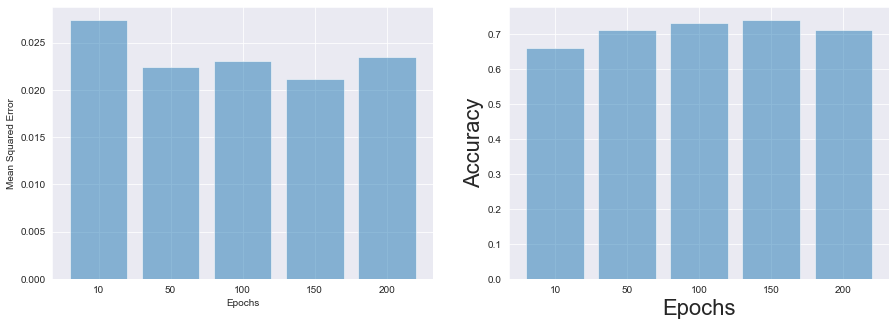

In [141]:
epochs_objects = epochs_values
epochs_performance = epochs_test_results_list

# plot performances bars
epochs_fig, epochs_axes = plt.subplots(1, 2, figsize=(15,5))
y_pos = np.arange(len(epochs_objects))
# get mean squared error from performance
epochs_model_mse = [x[0] for x in epochs_performance]
epochs_axes[0].bar(y_pos, epochs_model_mse, align='center', alpha=0.5)
epochs_axes[0].set_xticks(y_pos)
epochs_axes[0].set_xticklabels(epochs_objects)
epochs_axes[0].set_xlabel("Epochs")
epochs_axes[0].set_ylabel("Mean Squared Error")

# plot accuracy from performance
epochs_model_acc = [x[1] for x in epochs_performance]
epochs_axes[1].bar(y_pos, epochs_model_acc, align='center', alpha=0.5)
epochs_axes[1].set_xticks(y_pos)
epochs_axes[1].set_xticklabels(epochs_objects)
epochs_axes[1].set_xlabel("Epochs", fontsize=22)
epochs_axes[1].set_ylabel("Accuracy", fontsize=22)


In [142]:
#Within our class we now need code for each of the components of k-NN.
#First, let's create a method that will measure the distance between two vectors.
def euclidean(instance1, instance2):
        '''
        Calculates euclidean distance between two instances of data
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        distance = 0
        for val1, val2 in zip(instance1, instance2):            
            distance += pow((val1 - val2), 2)
        
        distance = pow(distance, 1/2)
             
              
        return 1 / (1+ distance)
    

def manhattan(instance1, instance2):
        '''
        Calculates manhattan distance between two instances of data
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        distance = 0
        for val1, val2 in zip(instance1, instance2):
            distance += abs(val1 - val2)      
              
        return 1 / (1+ distance)
    
def dot_product(instance1, instance2):
        '''
        Calculates dot product between two instances 
        instance1 will be a List of Float values
        instance2 will be a List of Float values
        length will be an Integer denoting the length of the Lists
        '''
        return np.dot(instance1, instance2)

In [143]:
#Finally, we can test to see how many of the test instances we got correct
def accuracy_knn(results):
    correct = 0
    for predict, target in results:
         if predict == target:
            correct += 1
    return (correct/float(len(results))) * 100.0

In [144]:
class kNN:
    """
    Parameters
    X_train, Y_train : list
    these consists of the training set feature values and associated class labels
    k : int
    specify the number of neighbours
    sim : literal
    specify the name of the similarity metric (e.g. manhattan, eucliedean)
    weighted : Boolean
    specify the voting strategy as weighted or not weighted by similarity values
  
    Attributes
    -----------  
    Results : list
      Target and predicted class labels for the test data.    
    """


    def __init__(self, X_train, Y_train, k=3, sim=manhattan, weighted=False):
        self.X_train = X_train
        self.Y_train = Y_train
        
        if k <= len(self.X_train):
            self.k = k # set the k value for neighbourhood size
        else:
            self.k = len(self.X_train) # to ensure the get_neighbours dont crash
    
        self.similarity = sim # specify a sim metric that has been pre-defined e.g. manhattan or euclidean
        
        self.weighted = weighted # boolean to choose between weighted / unweighted majority voting
        
        #store results from testing 
        self.results= []
        
    #With k-NN, we are interested in finding the k number of points with the greatest similarity 
    # to the the query or test instance.
    def get_neighbours(self, test_instance):
        '''
        Locate most similar neighbours 
        X_train will be a containing features (Float) values (i.e. your training data)
        Y_train will be the corresponding class labels for each instance in X_train
        test_instance will be a List of Float values (i.e. a query instance)
        '''
        similarities = [] # collection to store the similarities to be computed

        for train_instance, y in zip(self.X_train, self.Y_train): #for each member of the training set
            sim = self.similarity(test_instance, train_instance) #calculate the similarity to the test instance
            
            similarities.append((y, sim)) #add the actual label of the example and the computed similarity to a collection 
        #print(distances)
        similarities.sort(key = operator.itemgetter(1), reverse = True) #sort the collection by decreasing similarity
        neighbours = [] # holds the k most similar neighbours
        for x in range(self.k): #extract the k top indices of the collection for return
            neighbours.append(similarities[x])

        return neighbours

    # given the neighbours make a prediction
    # the boolean parameter when set to False will use unweighted majority voting; otherwise weighted majority voting
    # weighting can be helpful to break any ties in voting
    def predict(self, neighbours):
        '''
        Summarise a prediction based upon weighted neighbours calculation
        '''
        class_votes = {}
        for x in range(len(neighbours)):
            response = neighbours[x][0]
            if response in class_votes:
                class_votes[response] += (1-self.weighted) + (self.weighted * neighbours[x][1]) #if not weighted simply add 1
                #class_votes[response] += [1, neighbours[x][1]][weighted == True] 
              
            else:
                class_votes[response] = (1-self.weighted) + (self.weighted * neighbours[x][1])
                #class_votes[response] = [1, neighbours[x][1]][weighted == True] 
                
        #print(class_votes)
        sorted_votes = sorted(class_votes, key = lambda k: (class_votes[k], k), reverse = True)
        #print(sorted_votes)
        return sorted_votes[0]
    
    #iterate through all the test data to calculate accuracy
    def test(self, X_test, Y_test):
        self.results = [] # store the predictions returned by kNN

        for test_instance, target_label in zip(X_test, Y_test):
            neighbours = self.get_neighbours(test_instance)
            predict_label = self.predict(neighbours)
            self.results.append([predict_label, target_label])
            #print('> predicted = ', result,', actual = ', test_label)
    

In [145]:
#create an instance of kNN 
# pass the training instances with their class labels (i.e. X_train and Y_train)
# we will use the default kNN class settings for parameters i.e. k=3, sim=manhattan, weighted=False

knn = kNN(X_train_knn, Y_train_knn)
knn.test(X_test_knn, Y_test_knn) # now get the predictions on the test set

print("kNN Accuracy on test set is: ", accuracy_knn(knn.results))


kNN Accuracy on test set is:  52.0


In [146]:
print("Setup the kNN instances ...")
knn_list = []
ks = [11, 21, 31, 41, 51] # try a few different values for k
is_weighted = [False, True] # try two different forms of voting

# iterate over different voting strategies
for weighted in is_weighted:
    knn_list_element = [] # first set of knns with a specified voting scheme
    #iterate over different k values
    for k in ks:
        #create the different instances of the kNN class
        knn = kNN(X_train_knn, Y_train_knn, k, euclidean, weighted)
        
        knn_list_element.append(knn)
        pass
    
    knn_list.append(knn_list_element)# now append the set of models 
    pass


#lets test the kNNs 
#iterate through each model and accumilate number of correct predictions
knn_results = []
knn_result_element = []

for knn1 in knn_list:
    knn_result_element = []

    for knn2 in knn1:
        knn2.test(X_test_knn, Y_test_knn)
             
        knn_result_element.append(accuracy_knn(knn2.results))
        
        pass
    pass
    knn_results.append(knn_result_element)
    pass
print("Results from trials...", knn_results)

Setup the kNN instances ...
Results from trials... [[55.00000000000001, 53.0, 59.0, 56.99999999999999, 54.0], [56.00000000000001, 54.0, 59.0, 57.99999999999999, 55.00000000000001]]


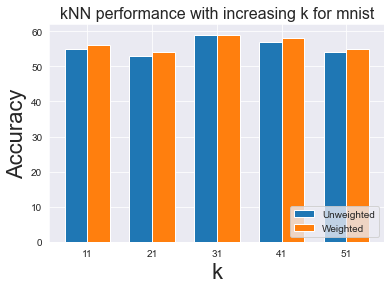

In [147]:
N = len(ks) # this is the number of results we want to plot pn the x-axis
ind = np.arange(N) 

performance1 = knn_results[0]
performance2 = knn_results[1]

width = 0.35 # width of the bar      
plt.bar(ind, performance1, width, label='Unweighted')
plt.bar(ind + width, performance2, width, label='Weighted')

plt.ylabel('Accuracy', fontsize=22)
plt.xlabel('k', fontsize=22)
plt.title('kNN performance with increasing k for mnist', fontsize=16)

plt.xticks(ind + width / 2, ks)
plt.legend(loc='lower right')
plt.show()